
# Due Dates

* Textbook: Thursday, September 20, in class
* Coding: Thursday, September 20, at 11:59 PM

# Textbook Problems

* 1.2
* 1.11
* 1.12


# Get Started



In [7]:
# This is code to load the assignment.
# You'll need to run this code do or restart the assignment.
from loadAssignment import loadAssignment
Assignment, Questions, Submit = loadAssignment(1)

# These are modules that we need
# once you run this code, you don't need to load them again
import numpy as np
import scipy.linalg as la
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline


# Background: Numpy

We will work a lot with `numpy` matrices and vectors.



In [8]:
# We define matrices in numpy as follows:
M = np.array([[1.,-2.,0],
              [-3.,5.,8.]])

print('M:')
print(M)

M:
[[ 1. -2.  0.]
 [-3.  5.  8.]]



# Background: Numpy Vectors vs. Matrices

We must make a brief digression to discuss the distinction between vectors and matrices in Numpy.



In [9]:
print('Matrices are Numpy arrays with two indices:')
M = np.array([[1.,2],
              [0,4],
              [-1,6]])
print('M:')
print(M)
print('M[1,1]: ', M[1,1])
print('M[2,0]: ', M[2,0])

print('Matrices can also be interpreted as a list-of-lists.')
print('Specifically, the matrix is a list of rows')

print('M[0]: ', M[0])

print('In Numpy, is it common to represent vectors as arrays with just a single index:')
z = np.array([-2.0,3.,5.])
print('z: ',z)
print('z[0]: ', z[0])

Matrices are Numpy arrays with two indices:
M:
[[ 1.  2.]
 [ 0.  4.]
 [-1.  6.]]
M[1,1]:  4.0
M[2,0]:  -1.0
Matrices can also be interpreted as a list-of-lists.
Specifically, the matrix is a list of rows
M[0]:  [1. 2.]
In Numpy, is it common to represent vectors as arrays with just a single index:
z:  [-2.  3.  5.]
z[0]:  -2.0



## Multiplying Vectors and Matrices 



In [10]:
print('np.dot treats vectors as either a row vector or column vector depending on which side they occur')
print('On the left, z acts as a row vector')
print('zM: ', np.dot(z,M))

x = np.array([1.,1.])
print('x: ', x)
print('On the right, Numpy treats x as a column vector.')
print('When you print the result, it "looks" like a row vector, but these are the correct values')
print('Mx: ', np.dot(M,x))

print('np.dot treats multiplication of vectors as a dot product')
y = np.array([2.,3.])
print('y: ', y)
print("y\'x:", np.dot(y,x))

print('To get an outer product of vectors, instead use np.outer')
print("xy\':")
print(np.outer(x,y))

np.dot treats vectors as either a row vector or column vector depending on which side they occur
On the left, z acts as a row vector
zM:  [-7. 38.]
x:  [1. 1.]
On the right, Numpy treats x as a column vector.
When you print the result, it "looks" like a row vector, but these are the correct values
Mx:  [3. 4. 5.]
np.dot treats multiplication of vectors as a dot product
y:  [2. 3.]
y'x: 5.0
To get an outer product of vectors, instead use np.outer
xy':
[[2. 3.]
 [2. 3.]]




# Autoregressive Models

One of the simplest and most important time-series model is called an autoregressive (AR) model. 

If $y_0,y_1,\ldots,y_{N-1}$ is a series of scalar measurements, an autoregessive model of order $p$ is given by:
\begin{equation*}
y_t = \theta_0 + y_{t-1} \theta_1 + y_{t-2} \theta_2 + \cdots + \theta_p y_{t-p} + v_t, 
\end{equation*}
where $\theta_i$ are coefficients of the model and $v_t$ is unmeasured noise. Note then, this assumes that the output at time $t$ is an affine function of the past $p$ measurements, along with some noise. 

The natural cost for an autoregressive model is given by:

\begin{equation*}
J(\theta) = \frac{1}{2} \sum_{t=p}^{N-1} 
(\theta_0 + y_{t-1} \theta_1 + y_{t-2} \theta_2 + \cdots + \theta_p y_{t-p} - y_t)^2
\end{equation*}

# Question 0

Recall the temperature data from the previous homework



Text(0,0.5,'Temperature (F)')

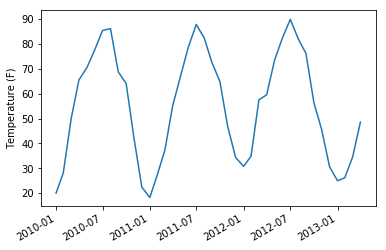

In [11]:
import data
YTrain,DateTrain,YTest,DateTest = data.extractMonthlyTempData()

import datetime as dt
import matplotlib.dates as mdates

# This is just to make stuff look nice
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_ticks(DateTrain[::6])
# This is the real command
plt.plot(DateTrain,YTrain)
# This is also just to make stuff look nice.
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature (F)')


In the next few questions, we will fit an autoregressive model of order $5$ to `YTrain`. 

For thie first part, find a matrix, $\Phi$ and a vector $Y$ so that 
\begin{equation*}
J(\theta) = \frac{1}{2}\| \Phi \theta - Y\|^2
\end{equation*}

To get the data in the right shape, the command [`la.toeplitz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.toeplitz.html) could be helpful. 



In [23]:
o=range(5)
print(YTrain,len(YTrain))

date
2010-01-31    20.032258
2010-02-28    28.071429
2010-03-31    50.032258
2010-04-30    65.533333
2010-05-31    70.483871
2010-06-30    77.500000
2010-07-31    85.419355
2010-08-31    86.193548
2010-09-30    68.866667
2010-10-31    64.064516
2010-11-30    42.466667
2010-12-31    22.419355
2011-01-31    18.290323
2011-02-28    26.964286
2011-03-31    37.419355
2011-04-30    55.133333
2011-05-31    67.193548
2011-06-30    78.733333
2011-07-31    87.870968
2011-08-31    82.387097
2011-09-30    72.533333
2011-10-31    64.903226
2011-11-30    46.966667
2011-12-31    34.419355
2012-01-31    30.774194
2012-02-29    34.827586
2012-03-31    57.548387
2012-04-30    59.566667
2012-05-31    73.548387
2012-06-30    82.333333
2012-07-31    89.903226
2012-08-31    82.096774
2012-09-30    76.200000
2012-10-31    56.354839
2012-11-30    45.633333
2012-12-31    30.580645
2013-01-31    25.000000
2013-02-28    26.178571
2013-03-31    34.645161
2013-04-30    48.600000
Freq: M, Name: (max temp F), dtype:

In [39]:
# Define Phi and Y here
n = len(YTrain)-5
m = 6
Phi = [0] * n
for i in range(n):
    Phi[i] = [1.0] * m
for i in range(len(YTrain)-5):
    for j in range(6):
        if j==0 :
            Phi[i][j]=1.0
        else:
            Phi[i][j]=YTrain[5+i-j]
Y=YTrain[5:]

Questions[0].checkAnswer(Phi,Y)

That is correct. Nice.
A score of 1 was entered for Question 0



# Question 1

Compute the least-squares solution for $\theta$. Two possible methods are:

- Use [`la.lstsq`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html) for low-level least-squares optimization
- Use [`opt.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) as in the last homework. 

Make a plot with `DateTrain[5:]` on the $x$-axis and temperature on the $y$-axis.
Your plot should have two curves:
* One curve should have  `Y` on the $y$-axis
* The other curve should have your predictions `np.dot(Phi,theta)` on the $y$-axis



True - Test:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
Passed
True - Test:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
Passed
Oh yeah!
A score of 1 was entered for Question 1


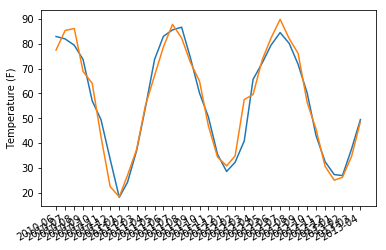

In [46]:
# Make your plot here
theta,residuals,rank,s = np.linalg.lstsq(Phi, Y, rcond=None)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_ticks(DateTrain[5:])
plt.plot(DateTrain[5:],np.dot(Phi,theta))
plt.plot(DateTrain[5:],YTrain[5:])
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature (F)')
Questions[1].checkAnswer()

In [47]:
# We'll use theta again so let's store it with a different name
theta_batch = theta


# Background: functions with variable input numbers

A bit of coding trickery that can be helpful is writing functions that can take a variable number of inputs.



In [50]:
def addManyNumbers(*nums):
    return np.sum(nums)

# Let's test iter
print(addManyNumbers(1,2))
print(addManyNumbers(1,2,3))
print(addManyNumbers(1,2,3,4))

3
6
10



# Question 2

In this class, we will often need to take products of many matrices. Writing `np.dot(A,np.dot(B,np.dot(C,D)))` for $ABCD$ would be painful. 

Write a function called `dot` that takes an arbitrary number of matrices and computes their product. For example we should have:

```
AB = dot(A,B)
ABC = dot(A,B,C)
ABCD = dot(A,B,C,D)
```



In [51]:
# Write your function here

def dot(*arg):
    Answer=arg[0]
    for i in range(len(arg)-1):
        Answer= np.dot(Answer,arg[i+1])
    return Answer
Questions[2].checkAnswer(dot)

Huzzah.
A score of 1 was entered for Question 2



# Question 3

Implement the recursive least squares algorithm, which corresponds to equations (1.65-1.67) or (1.78-1.80) in the book. Specifically, write a function of the form

```
x_hat_new, P_new = rlsUpdate(y_new,x_hat,P,H_new,W_new)
```



In [52]:
# Write your function Here
def rlsUpdate(y_new,x_hat,P,H_new,W_new):
    INV=np.linalg.inv(dot(H_new,P,np.transpose(H_new))+np.linalg.inv(W_new))
    K_new=dot(P,np.transpose(H_new),INV)
    x_hat_new= x_hat+dot(K_new,(y_new-dot(H_new,x_hat)))
    P_new=dot(np.eye(len(x_hat))-dot(K_new,H_new),P)
    return x_hat_new, P_new
Questions[3].checkAnswer(rlsUpdate)

Hoorah!
A score of 1 was entered for Question 3




# Question 4

Use your recursive least squares algorithm to compute a sequence of parameter estimates, $\theta_t$. Store the result as a matrix of the form:

\begin{equation*}
\Theta = \begin{bmatrix}
\theta_0^\top \\
\theta_1^\top \\
\vdots \\
\end{bmatrix}
\end{equation*}

(Note: You can store the sequence of parameter vectors as a list using `append` and then stack as a matrix at the end using the command `np.array`)

Recall that recursive least squares requires the $P_t$ matrices to be invertible at each step. In particular, the first matrix $P_0$ must be invertible. In order to ensure this, assume that $H_0$ is constructed from the first $6$ rows of `Phi`, and so the first "measurement", $y_0$, must consist of the first $5$ entries of `Y`. This corresponds to `Phi[:6]` and `Y[:6]`. 

After computing $\theta_0$ assume that measurements arrive one at a time. Based on python indexing, this would mean that $H_t$ is constructed from `Phi[5+t:6+t]` and $y_t$ is constucted from `Y[5+t:6+t]` for $t=1,2,\ldots$.  

Assume that $W_t$ is an identity matrix of appropriate size for at each step.



In [90]:
# Make the matrix of parameters here
H_0=Phi[:6]
W_0=np.eye(len(H_0))
P_0=np.linalg.inv(dot(np.transpose(H_0),W_0,H_0))
x_hat=np.transpose(dot(P_0,transpose(H_0),W_0,Y[:6]))
list=[x_hat]
P=P_0
for t in range(29):
    y_new=Y[5+t+1:6+t+1]
    H_new=Phi[5+t+1:6+t+1]
    W_new=np.eye(len(H_new))
    x_hat_new, P_new=rlsUpdate(y_new,x_hat,P,H_new,W_new)
    list.append(x_hat_new)
    x_hat=x_hat_new
    P=P_new
    Theta= np.array(list)
Theta= np.array(list)
Questions[4].checkAnswer(Theta)

Spot on.
A score of 1 was entered for Question 4


Final difference: [ 4.65405492e-12 -1.51656465e-13  7.43849426e-14  1.20459198e-13
 -1.10071674e-13 -1.92623695e-14]


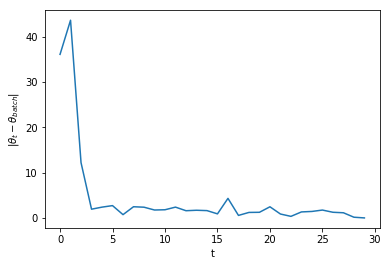

In [91]:
# If you've done this correctly 
# the final value of theta should be exactly the same as the batch value
# 
ThetaDiff = Theta - np.outer(np.ones(len(Theta)),theta_batch)
plt.plot(la.norm(ThetaDiff,axis=1))
plt.ylabel(r'$|\theta_t - \theta_{batch}|$')
plt.xlabel('t')
print('Final difference:', ThetaDiff[-1])


# Final Score

You can run this code to see all of your scores.




In [92]:
Assignment.showResults()

Problem 0: 1
Problem 1: 1
Problem 2: 1
Problem 3: 1
Problem 4: 1

Total: 5 / 5





# Submission

Save your work and run this cell to submit. It will only work if you have the internet.



In [ ]:
Submit()